In [232]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [233]:
# Configurações fixas
np.random.seed(42)
random.seed(42)

table_names = ["Trades Receivable","Trades Payable", "Working Capital"]
tables = {}
for tab in table_names:
    df= pd.read_excel("WCM Datav0.xlsx", sheet_name=tab)
    tables[tab] = df

#### Trades Payable

In [234]:
df_pay = tables["Trades Payable"].copy()

# Datas
begin = df_pay["Month Year"].min()
end = df_pay["Month Year"].max()
# Período de 12 meses
months = pd.date_range(start=begin, periods=12, freq="MS")

# Valores únicos fixos
vendors = df_pay["Vendors"].unique()
countries = df_pay["Country"].unique()
due_intervals = df_pay["Due Interval"].unique()

# Geração dos dados
data = []

In [235]:
countries_id = {countries[i]:i+1 for i in range(len(countries))}
countries_df = pd.DataFrame(countries_id, index=[0]).T.reset_index()
countries_df.columns = ["Country", "Id"]
countries_df

,Country,Id
0,Brasil,1
1,Argentina,2
2,Colombia,3
3,Peru,4
4,Chile,5
5,Mexico,6
6,Vanuatu,7
7,Coreia do Sul,8
8,Namíbia,9
9,Ilhas Salomão,10


In [236]:
due_interval_weights = [0.4, 0.25, 0.15, 0.1, 0.07, 0.03]

# Geração dos dados (1 linha por mês + país)
data = []

for month in months:
    for country in countries:
        trades_payable = np.random.uniform(70_000, 200_000)
        dpo = np.random.uniform(40, 130)  # Days Payable Outstanding
        tr_ico_to_pay = trades_payable * np.random.uniform(0.4, 0.8)

        due_interval = random.choices(due_intervals, weights=due_interval_weights, k=1)[0]
        overdue_risk = {
            'Not Due': 0.01,
            '1-90 Days': 0.05,
            '91-180 Days': 0.1,
            '181-270 Days': 0.2,
            '270-360 Days': 0.3,
            'Over 360 Days': 0.4
        }[due_interval]
        overdue = trades_payable * (overdue_risk + (dpo - 40)/300 + np.random.normal(0, 0.01))

        data.append({
            "month_year": month,
            "country": country,
            "trades_payable": round(trades_payable, 2),
            "overdue": round(overdue, 2),
            "dpo": round(dpo, 1),
            "tr_ico_to_pay": round(tr_ico_to_pay, 2),
            "due_interval": due_interval
        })

# Criar DataFrame final
df_payable = pd.DataFrame(data)

In [237]:
df_payable["id"] = [i+1 for i in range(df_payable.shape[0])]
# df_receivable["id_country"] = # TO DO
df_payable["id_trades"] = df_payable.apply(
    lambda row: str(row["month_year"])[:10].replace("-","") + str(countries_id[row["country"]]),
    axis=1
)
# Ordenando
first_cols_pay = ["id","id_trades"]
df_payable = df_payable[first_cols_pay+ [col for col in df_payable.columns if col not in first_cols_pay]]

In [238]:
df_payable.head()

,id,id_trades,month_year,country,trades_payable,overdue,dpo,tr_ico_to_pay,due_interval
0,1,202405011,2024-05-01,Brasil,118690.22,38466.96,125.6,82228.29,1-90 Days
1,2,202405012,2024-05-01,Argentina,90279.29,2763.82,45.2,67390.82,Not Due
2,3,202405013,2024-05-01,Colombia,148144.95,32090.12,103.7,60477.78,Not Due
3,4,202405014,2024-05-01,Peru,93842.59,9010.86,67.4,57234.83,Not Due
4,5,202405015,2024-05-01,Chile,126152.85,23097.11,66.2,81335.94,91-180 Days


In [239]:
df_payable.shape

(288, 9)

#### Trades Receivable

In [241]:
# Dados de entrada (customers já extraídos de uma célula anterior)
customers = tables["Trades Receivable"]["Customer"].unique()
# Geração dos dados
data = []

In [242]:
due_interval_weights = [0.35, 0.3, 0.15, 0.1, 0.07, 0.03]

data = []

for month in months:
    for country in countries:
        trades_receivable = np.random.uniform(80_000, 250_000)
        sales = trades_receivable * np.random.uniform(1.0, 1.5)
        dso = np.random.uniform(30, 110)  # Days Sales Outstanding
        cei = np.random.uniform(0.5, 1.0)  # Collection Effectiveness Index
        art = dso * np.random.uniform(0.8, 1.2)  # Accounts Receivable Turnover

        due_interval = random.choices(due_intervals, weights=due_interval_weights, k=1)[0]
        overdue_risk = {
            'Not Due': 0.02,
            '1-90 Days': 0.06,
            '91-180 Days': 0.12,
            '181-270 Days': 0.2,
            '270-360 Days': 0.3,
            'Over 360 Days': 0.4
        }[due_interval]
        overdue = trades_receivable * (overdue_risk + (dso - 30)/300 + np.random.normal(0, 0.01))

        data.append({
            "month_year": month,
            "country": country,
            "trades_receivable": round(trades_receivable, 2),
            "overdue": round(overdue, 2),
            "dso": round(dso, 1),
            "sales": round(sales, 2),
            "cei": round(cei, 2),
            "art": round(art, 2),
            "due_interval": due_interval
        })

df_receivable = pd.DataFrame(data)

In [243]:
df_receivable["id"] = [i+1 for i in range(df_receivable.shape[0])]
# df_receivable["id_country"] = # TO DO
df_receivable["id_trades"] = df_receivable.apply(
    lambda row: str(row["month_year"])[:10].replace("-","") + str(countries_id[row["country"]]),
    axis=1
)
# Ordenando
first_cols_pay = ["id","id_trades"]
df_receivable = df_receivable[first_cols_pay+ [col for col in df_receivable.columns if col not in first_cols_pay]]

In [244]:
df_receivable.head()

,id,id_trades,month_year,country,trades_receivable,overdue,dso,sales,cei,art,due_interval
0,1,202405011,2024-05-01,Brasil,244592.88,72456.27,99.5,267281.99,0.89,110.27,1-90 Days
1,2,202405012,2024-05-01,Argentina,186457.45,6479.17,32.6,198693.25,0.96,34.12,Not Due
2,3,202405013,2024-05-01,Colombia,215411.34,8120.89,39.4,267274.03,0.56,42.31,Not Due
3,4,202405014,2024-05-01,Peru,163571.07,44496.47,76.6,168822.44,0.63,85.67,91-180 Days
4,5,202405015,2024-05-01,Chile,132761.53,11659.33,30.9,162979.40,0.54,29.60,1-90 Days


In [245]:
df_receivable.shape

(288, 11)

#### Working Capital

In [247]:
df_wc = pd.merge(df_receivable[["id_trades","month_year","country","trades_receivable","due_interval"]], df_payable[["id_trades", "trades_payable"]], how="left", on="id_trades")
# Calculando diferença
df_wc["working_capital"] = df_wc.apply(
    lambda row: row["trades_receivable"]-row["trades_payable"],
    axis=1
)
# Selecionando colunas
df_wc = df_wc[["id_trades","month_year","country","working_capital", "due_interval"]]

In [248]:
df_wc.head()

,id_trades,month_year,country,working_capital,due_interval
0,202405011,2024-05-01,Brasil,125902.66,1-90 Days
1,202405012,2024-05-01,Argentina,96178.16,Not Due
2,202405013,2024-05-01,Colombia,67266.39,Not Due
3,202405014,2024-05-01,Peru,69728.48,91-180 Days
4,202405015,2024-05-01,Chile,6608.68,1-90 Days


In [249]:
df_wc.shape

(288, 5)

#### Salvando tabelas

In [262]:
with pd.ExcelWriter("WCM_modified.xlsx", engine="openpyxl") as writer:
    df_receivable.to_excel(writer, sheet_name="Trades Receivable", index=False)
    df_payable.to_excel(writer, sheet_name="Trades Payable", index=False)
    df_wc.to_excel(writer, sheet_name="Working Capital", index=False)

#### Análise preditiva

In [251]:

def predict_working_capital(insight: str, df_receivable: pd.DataFrame, df_payable: pd.DataFrame) -> str:
    """
    Ferramenta de predição que o agente pode usar para prever o working capital com base nos dados financeiros.
    
    Parâmetros:
    - insight: pergunta ou solicitação do usuário (não usada diretamente neste exemplo, mas pode ser usada para lógica futura)
    - df_receivable: DataFrame com dados de Trades Receivable
    - df_payable: DataFrame com dados de Trades Payable
    
    Retorna:
    - String com previsão do Working Capital para o próximo mês, por país.
    """
    
    # Passo 1: Combina os dados por (month_year, country)
    df = pd.merge(df_receivable, df_payable, on=['month_year', 'country'], suffixes=('_receivable', '_payable'))

    # Calcula o Working Capital como target
    df['working_capital'] = df['trades_receivable'] - df['trades_payable']
    
    # Transforma datas
    df['month'] = pd.to_datetime(df['month_year']).dt.month
    df['year'] = pd.to_datetime(df['month_year']).dt.year

    # Codifica país (simples)
    df['country_encoded'] = df['country'].astype('category').cat.codes

    # Seleciona features para predição
    features = [
        'trades_receivable', 'overdue_receivable', 'dso', 'sales', 'cei', 'art',
        'trades_payable', 'overdue_payable', 'dpo', 'tr_ico_to_pay',
        'month', 'year', 'country_encoded'
    ]
    
    X = df[features]
    y = df['working_capital']

    # Treina modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Prediz para o próximo mês, país por país
    latest_month = df['month_year'].max()
    next_month = pd.to_datetime(latest_month) + pd.DateOffset(months=1)
    
    result = f"📅 Previsões de *Working Capital* para {next_month.strftime('%B/%Y')}:\n"

    for country in df['country'].unique():
        # Últimos dados disponíveis para aquele país
        last_row = df[df['country'] == country].sort_values('month_year').iloc[-1].copy()
        last_row['month'] = next_month.month
        last_row['year'] = next_month.year
        X_pred = pd.DataFrame([last_row[features]])
        predicted_wc = model.predict(X_pred)[0]
        result += f"- {country}: R$ {predicted_wc:,.2f}\n"
    
    return result


In [252]:
print(predict_working_capital(insight="teste",df_payable=df_payable, df_receivable=df_receivable))

📅 Previsões de *Working Capital* para May/2025:
- Brasil: R$ -72,812.96
- Argentina: R$ -19,259.96
- Colombia: R$ 10,035.87
- Peru: R$ 44,688.68
- Chile: R$ 54,238.19
- Mexico: R$ 14,116.69
- Vanuatu: R$ 34,583.05
- Coreia do Sul: R$ 26,817.76
- Namíbia: R$ 65,011.56
- Ilhas Salomão: R$ 93,589.15
- Guam: R$ -60,749.84
- Ilhas Turcas e Caicos: R$ 65,683.96
- Burquina Faso: R$ 129,665.96
- Honduras: R$ -43,808.34
- Granada: R$ -22,410.70
- Dhekelia: R$ 56,902.79
- Mali: R$ 3,375.67
- Portugal: R$ 30,846.69
- Papua-Nova Guiné: R$ 80,482.23
- Malávi: R$ 41,849.50
- Burundi: R$ 68,609.29
- Congo-Kinshasa: R$ 78,723.58
- Dinamarca: R$ -55,612.34
- Senegal: R$ 124,845.73



📊 Avaliação do modelo:
MAE (Erro absoluto médio): R$ 7,655.85
RMSE (Raiz do erro quadrático médio): R$ 9,632.12
R² (Coeficiente de determinação): 0.97


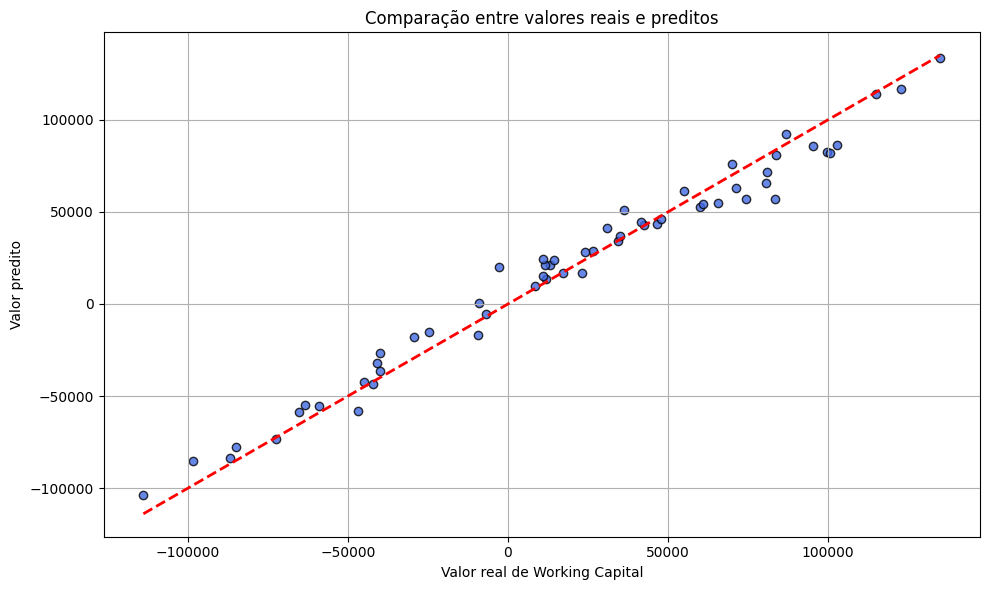

In [253]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Junta os dados
df = pd.merge(df_receivable, df_payable, on=['month_year', 'country'], suffixes=('_receivable', '_payable'))

# 2. Calcula Working Capital
df['working_capital'] = df['trades_receivable'] - df['trades_payable']

# 3. Engenharia de features
df['month'] = pd.to_datetime(df['month_year']).dt.month
df['year'] = pd.to_datetime(df['month_year']).dt.year
df['country_encoded'] = df['country'].astype('category').cat.codes

# 4. Features e target
features = [
    'trades_receivable', 'overdue_receivable', 'dso', 'sales', 'cei', 'art',
    'trades_payable', 'overdue_payable', 'dpo', 'tr_ico_to_pay',
    'month', 'year', 'country_encoded'
]
target = 'working_capital'

X = df[features]
y = df[target]

# 5. Split treino/teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Treinamento do modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Predição nos dados de teste
y_pred = model.predict(X_test)

# 8. Avaliação
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Avaliação do modelo:")
print(f"MAE (Erro absoluto médio): R$ {mae:,.2f}")
print(f"RMSE (Raiz do erro quadrático médio): R$ {rmse:,.2f}")
print(f"R² (Coeficiente de determinação): {r2:.2f}")

# 9. Comparação visual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.8, color='royalblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor real de Working Capital')
plt.ylabel('Valor predito')
plt.title('Comparação entre valores reais e preditos')
plt.grid(True)
plt.tight_layout()
plt.show()


In [254]:
### RECEIVABLE
def predict_trades_receivable(df_receivable: pd.DataFrame) -> str:

    df = df_receivable.copy()
    df['month'] = pd.to_datetime(df['month_year']).dt.month
    df['year'] = pd.to_datetime(df['month_year']).dt.year
    df['country_encoded'] = df['country'].astype('category').cat.codes

    features = ['overdue', 'dso', 'sales', 'cei', 'art', 'month', 'year', 'country_encoded']
    target = 'trades_receivable'

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Previsão para o próximo mês
    latest_month = pd.to_datetime(df['month_year'].max())
    next_month = latest_month + pd.DateOffset(months=1)

    result = f"📈 Previsões de *Trades Receivable* para {next_month.strftime('%B/%Y')}:\n"

    for country in df['country'].unique():
        row = df[df['country'] == country].sort_values('month_year').iloc[-1].copy()
        row['month'] = next_month.month
        row['year'] = next_month.year
        X_pred = pd.DataFrame([row[features]])
        pred = model.predict(X_pred)[0]
        result += f"- {country}: R$ {pred:,.2f}\n"

    return result


In [255]:
print(predict_trades_receivable(df_receivable=df_receivable))

📈 Previsões de *Trades Receivable* para May/2025:
- Brasil: R$ 114,495.13
- Argentina: R$ 95,103.48
- Colombia: R$ 115,053.58
- Peru: R$ 208,270.84
- Chile: R$ 210,284.28
- Mexico: R$ 180,335.36
- Vanuatu: R$ 215,307.46
- Coreia do Sul: R$ 202,598.47
- Namíbia: R$ 152,821.61
- Ilhas Salomão: R$ 204,788.33
- Guam: R$ 112,935.32
- Ilhas Turcas e Caicos: R$ 187,559.88
- Burquina Faso: R$ 217,744.91
- Honduras: R$ 142,875.28
- Granada: R$ 91,874.83
- Dhekelia: R$ 143,021.39
- Mali: R$ 135,860.56
- Portugal: R$ 229,259.21
- Papua-Nova Guiné: R$ 170,150.96
- Malávi: R$ 145,997.61
- Burundi: R$ 191,857.70
- Congo-Kinshasa: R$ 184,103.62
- Dinamarca: R$ 120,531.16
- Senegal: R$ 239,500.26



In [256]:
### PAYABLE
def predict_trades_payable(df_payable: pd.DataFrame) -> str:

    df = df_payable.copy()
    df['month'] = pd.to_datetime(df['month_year']).dt.month
    df['year'] = pd.to_datetime(df['month_year']).dt.year
    df['country_encoded'] = df['country'].astype('category').cat.codes

    features = ['overdue', 'dpo', 'tr_ico_to_pay', 'month', 'year', 'country_encoded']
    target = 'trades_payable'

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Previsão para o próximo mês
    latest_month = pd.to_datetime(df['month_year'].max())
    next_month = latest_month + pd.DateOffset(months=1)

    result = f"📉 Previsões de *Trades Payable* para {next_month.strftime('%B/%Y')}:\n"

    for country in df['country'].unique():
        row = df[df['country'] == country].sort_values('month_year').iloc[-1].copy()
        row['month'] = next_month.month
        row['year'] = next_month.year
        X_pred = pd.DataFrame([row[features]])
        pred = model.predict(X_pred)[0]
        result += f"- {country}: R$ {pred:,.2f}\n"

    return result


In [257]:
print(predict_trades_payable(df_payable=df_payable))

📉 Previsões de *Trades Payable* para May/2025:
- Brasil: R$ 179,502.00
- Argentina: R$ 124,422.64
- Colombia: R$ 118,094.00
- Peru: R$ 188,257.54
- Chile: R$ 161,062.84
- Mexico: R$ 164,603.15
- Vanuatu: R$ 168,952.77
- Coreia do Sul: R$ 170,817.14
- Namíbia: R$ 79,391.75
- Ilhas Salomão: R$ 114,037.06
- Guam: R$ 171,122.65
- Ilhas Turcas e Caicos: R$ 121,341.19
- Burquina Faso: R$ 89,141.24
- Honduras: R$ 158,567.85
- Granada: R$ 105,233.99
- Dhekelia: R$ 81,730.20
- Mali: R$ 137,592.13
- Portugal: R$ 190,395.04
- Papua-Nova Guiné: R$ 102,006.83
- Malávi: R$ 102,231.74
- Burundi: R$ 124,788.79
- Congo-Kinshasa: R$ 106,725.26
- Dinamarca: R$ 159,325.47
- Senegal: R$ 122,146.76



#### Previsões com insights

In [258]:
def predict_overdue_risk(df_receivable: pd.DataFrame, increase_only: bool = True) -> str:
    """
    Previsão de risco de inadimplência futura com base na razão entre valores vencidos e contas a receber.

    Essa função treina um modelo de regressão (Random Forest) utilizando dados históricos de contas a receber 
    para prever a razão de inadimplência (overdue_ratio) no mês seguinte, para cada país.

    Parâmetros:
    -----------
    df_receivable : pd.DataFrame
        DataFrame contendo os dados históricos de contas a receber com as seguintes colunas:
        - 'month_year', 'country', 'trades_receivable', 'overdue', 'dso', 'sales', 'cei', 'art'.

    increase_only : bool, opcional (default=True)
        Se True, retorna apenas os países cuja razão de inadimplência prevista aumentou.
        Se False, retorna todos os países com o valor atual e previsto.

    Retorno:
    --------
    str
        Texto formatado com a previsão de inadimplência para o mês seguinte, indicando os países com aumento 
        (ou não) na razão de inadimplência. Exibe os valores atuais, previstos e a diferença percentual.
    """

    df = df_receivable.copy()
    df['overdue_ratio'] = df['overdue'] / df['trades_receivable']
    df['month'] = pd.to_datetime(df['month_year']).dt.month
    df['year'] = pd.to_datetime(df['month_year']).dt.year
    df['country_encoded'] = df['country'].astype('category').cat.codes

    features = ['dso', 'sales', 'cei', 'art', 'month', 'year', 'country_encoded']
    target = 'overdue_ratio'

    X = df[features]
    y = df[target]

    # Split dos dados
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Modelo
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Previsão para o próximo mês
    latest_month = pd.to_datetime(df['month_year'].max())
    next_month = latest_month + pd.DateOffset(months=1)

    result = f"⚠️ Previsão de *risco de inadimplência* para {next_month.strftime('%B/%Y')}:\n\n"

    for country in df['country'].unique():
        last_row = df[df['country'] == country].sort_values('month_year').iloc[-1].copy()
        last_ratio = last_row['overdue_ratio']

        last_row['month'] = next_month.month
        last_row['year'] = next_month.year
        X_pred = pd.DataFrame([last_row[features]])
        predicted_ratio = model.predict(X_pred)[0]

        delta = predicted_ratio - last_ratio
        if increase_only and delta <= 0:
            continue  # ignora países onde o risco não aumentou

        emoji = "🔺" if delta > 0 else "✅"
        result += f"{emoji} {country}: de {last_ratio:.2%} para {predicted_ratio:.2%} ({delta:+.2%})\n"

    return result if result.strip() else "Nenhum país apresenta tendência de aumento na inadimplência."


In [259]:
print(predict_overdue_risk(df_receivable=df_receivable))

⚠️ Previsão de *risco de inadimplência* para May/2025:

🔺 Brasil: de 17.07% para 19.75% (+2.69%)
🔺 Peru: de 14.90% para 17.36% (+2.46%)
🔺 Chile: de 13.35% para 15.90% (+2.55%)
🔺 Coreia do Sul: de 5.53% para 7.38% (+1.85%)
🔺 Namíbia: de 28.88% para 29.62% (+0.73%)
🔺 Ilhas Salomão: de 28.90% para 32.40% (+3.49%)
🔺 Guam: de 16.01% para 16.37% (+0.36%)
🔺 Ilhas Turcas e Caicos: de 16.17% para 19.12% (+2.95%)
🔺 Granada: de 21.40% para 25.13% (+3.73%)
🔺 Mali: de 25.05% para 26.76% (+1.71%)
🔺 Malávi: de 26.03% para 31.31% (+5.27%)
🔺 Dinamarca: de 12.19% para 27.09% (+14.90%)



In [260]:
def forecast_liquidity_risk(df_working_capital: pd.DataFrame, threshold: float = 0.0) -> str:
    """
    Previsão de risco de liquidez com base no capital de giro histórico por país.

    A função treina um modelo de regressão para prever o capital de giro (working_capital) 
    para o próximo mês. Países com previsão abaixo do limite (threshold) são considerados
    em risco de liquidez.

    Parâmetros:
    -----------
    df_working_capital : pd.DataFrame
        DataFrame com os dados históricos de capital de giro por país, contendo:
        - 'month_year', 'country', 'working_capital', 'due_interval'.

    threshold : float, opcional (default=0.0)
        Valor mínimo esperado de capital de giro. Países com previsão abaixo deste valor
        serão sinalizados como em risco de liquidez.

    Retorno:
    --------
    str
        Texto com os países em risco de liquidez no próximo mês, indicando valor atual,
        previsão e variação.
    """

    df = df_working_capital.copy()
    df['month'] = pd.to_datetime(df['month_year']).dt.month
    df['year'] = pd.to_datetime(df['month_year']).dt.year
    df['country_encoded'] = df['country'].astype('category').cat.codes
    df['due_interval_encoded'] = df['due_interval'].astype('category').cat.codes

    features = ['month', 'year', 'country_encoded', 'due_interval_encoded']
    target = 'working_capital'

    X = df[features]
    y = df[target]

    # Split dos dados
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Modelo
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Previsão para o próximo mês
    latest_month = pd.to_datetime(df['month_year'].max())
    next_month = latest_month + pd.DateOffset(months=1)

    result = f"🔍 Previsão de *risco de liquidez* para {next_month.strftime('%B/%Y')} (threshold = {threshold}):\n\n"

    for country in df['country'].unique():
        last_row = df[df['country'] == country].sort_values('month_year').iloc[-1].copy()
        last_value = last_row['working_capital']

        last_row['month'] = next_month.month
        last_row['year'] = next_month.year
        X_pred = pd.DataFrame([last_row[features]])
        predicted_value = model.predict(X_pred)[0]

        delta = predicted_value - last_value

        if predicted_value < threshold:
            result += (
                f"⚠️ {country}: {last_value:,.2f} → {predicted_value:,.2f} "
                f"({delta:+,.2f}) → risco de liquidez\n"
            )

    return result if result.strip() else "Nenhum país com risco de liquidez previsto."


In [261]:
print(forecast_liquidity_risk(df_working_capital=df_wc))

🔍 Previsão de *risco de liquidez* para May/2025 (threshold = 0.0):

⚠️ Peru: 41,484.06 → -3,348.90 (-44,832.96) → risco de liquidez
⚠️ Guam: -58,189.00 → -217.64 (+57,971.36) → risco de liquidez

